# Conhecendo e tratando o dataset: 
Nessa análise, exploraremos o conjunto de dados de bolsas pagas pelo CNPQ, no período de 2018 a 2021, adquirido através do pedido de LAI nº **01217.005867/2021-11**, respondido em 03/08/2021. Os dados de 2001 a 2017 estão disponíveis no portal de dados abertos, em formato xml, e serão anexados a esta análise posteriormente. 


In [ ]:
!pip install --upgrade pandas --user
import pandas as pd

# Definindo os caminhos para os arquivos como variáveis do ambiente de execução
output_path = '/content/drive/MyDrive/OPovo/Bolsonaro 1000 dias/Bolsas CNPQ/'

In [ ]:
dfLista = []
for i in range(2001, 2018):
  df = pd.read_xml(output_path+str(i)+'.xml', encoding='ISO-8859-1')

  df.columns=['Ano Referência', 'XXXX', 'Beneficiário', 'Sexo',
       'País Origem', 'Processo', 'Modalidade',
       'Categoria/Nível', 'Inicio Processo',
       'Término Processo', 'XXXX', 'XXXX',
       'Valor Pago', 'XXXX', 'Instituição Destino', 'Sigla Instituição Macro',
       'País Destino', 'Sigla UF Destino', 'XXXX',
       'XXXX', 'XXXX', 'Grande Área',
       'Área', 'Subárea',
       'XXXX', 'XXXX']

  df = df[['Ano Referência', 'Beneficiário', 'Sexo',
       'País Origem', 'Processo', 'Modalidade',
       'Categoria/Nível', 'Inicio Processo',
       'Término Processo','Valor Pago', 'Instituição Destino', 'Sigla Instituição Macro',
       'País Destino', 'Sigla UF Destino','Grande Área','Área', 'Subárea']]
  dfLista.append(df)

for i in range(2018,2022):
  df = pd.read_csv(output_path+str(i)+'.csv')
  dfLista.append(df)  

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dfFull = pd.concat(dfLista)
dfFull

,Ano Referência,Beneficiário,Sexo,País Origem,Processo,Modalidade,Categoria/Nível,Inicio Processo,Término Processo,Valor Pago,Instituição Destino,Sigla Instituição Macro,País Destino,Sigla UF Destino,Grande Área,Área,Subárea,Nome Chamada,Programa CNPq,Sigla Instituição Destino,Cidade Destino,Título do Projeto,Palavra Chave,Instituição Origem,Sigla UF Origem
0,2001.0,Paulo Henrique Reis Pereira,M,Brasil,100001/2001-7,Iniciação Científica,NI,01/01/2001,31/07/2001,1690.57,Universidade Federal de Minas Gerais,UFMG,Brasil,MG,Ciências Agrárias,Medicina Veterinária,Medicina Veterinária Preventiva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001.0,Petrucio Antunes Martins,M,Brasil,100002/1998-6,Iniciação Científica/PIBIC,NI,01/01/1998,31/07/2001,483.02,Universidade Federal da Paraíba,UFPB,Brasil,PB,Engenharias e Ciência da Computação,Engenharia Civil,Engenharia Hidráulica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001.0,José Iran Cardoso da Silva,M,Brasil,100002/2000-5,Iniciação Científica,NI,01/01/2000,31/10/2001,2415.1,Universidade do Tocantins,UNITINS,Brasil,TO,Ciências Agrárias,Medicina Veterinária,Clínica e Cirurgia Animal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001.0,Rodrigo Norberto Pereira,M,Brasil,100002/2001-3,Iniciação Científica,NI,01/01/2001,31/07/2001,1690.57,Universidade Estadual Paulista Julio de Mesqui...,UNESP,Brasil,SP,Ciências Biológicas,Parasitologia,Protozoologia de Parasitos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001.0,Marcelo José Condack,M,Brasil,100003/2000-1,Iniciação Científica,NI,01/01/2000,28/02/2003,241.51,Universidade Federal do Rio de Janeiro,UFRJ,Brasil,RJ,"Lingüística, Letras e Artes",Lingüística,Sociolingüística e Dialetologia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96438,2021.0,Marília Pacheco,F,BRA - Brasil,382306/2020-1,DTI - Desenvolvimento Tecnológico Industrial,C,1/1/2021,4/30/2021,"4.400,00",Universidade Federal de Minas Gerais,UFMG,BRA - Brasil,MG,Ciências Sociais Aplicadas,Direito,Direito do Trabalho,Ch CNPq/SESCOOP - CHAMADA CNPQ/SESCOOP Nº 07/2...,PROGRAMA BASICO DE ENGENHARIA ELETRICA,UFMG,Belo Horizonte,Terceirização da Atividade Principal via Coope...,NaN,Universidade Federal de Minas Gerais,MG
96439,2021.0,Rafael Gonçalves de Quevedo,M,BRA - Brasil,382307/2020-8,DTI - Desenvolvimento Tecnológico Industrial,C,1/1/2021,7/31/2021,"4.400,00",Empresa Brasileira de Pesquisa Agropecuária,EMBRAPA,BRA - Brasil,DF,Ciências Agrárias,Agronomia,Fitotecnia,EncBolsasEMBRAPA2019 - PROGRAMA DE BOLSAS DA E...,Programa de Tecnologia e Inovação para Agropec...,EMBRAPA,Brasília,Convertido de: Viabilização da cultura da soja...,NaN,Empresa Brasileira de Pesquisa Agropecuária,DF
96440,2021.0,Jéssica Drechmer,F,BRA - Brasil,382309/2020-0,DTI - Desenvolvimento Tecnológico Industrial,C,1/1/2021,12/31/2021,"4.400,00",Empresa Brasileira de Pesquisa Agropecuária,EMBRAPA,BRA - Brasil,DF,Ciências Agrárias,Zootecnia,Genética e Melhoramento dos Animais Domésticos,EncBolsasEMBRAPA2019 - PROGRAMA DE BOLSAS DA E...,Programa de Tecnologia e Inovação para Agropec...,EMBRAPA,Brasília,Conservação Ex situ de Recursos Genéticos Animais,NaN,Empresa Brasileira de Pesquisa Agropecuária,DF
96441,2021.0,Brunno Bueno da Rosa,M,BRA - Brasil,382310/2020-9,DTI - Desenvolvimento Tecnológico Industrial,C,1/1/2021,6/30/2021,"4.400,00",Universidade de São Paulo,USP,BRA - Brasil,SP,Ciências Biológicas,Zoologia,Taxonomia dos Grupos Recentes,Polinizadores - Linha 2 - Monitoramento e aval...,Programa de Tecnologia e Inovação para Agropec...,USP,São Paulo,Consolidação da e-infraestrutura de dados aber...,NaN,Universidade de São Paulo,SP


In [ ]:
dfFull.columns

Index(['Ano Referência', 'Beneficiário', 'Sexo', 'País Origem', 'Processo',
       'Modalidade', 'Categoria/Nível', 'Inicio Processo', 'Término Processo',
       'Valor Pago', 'Instituição Destino', 'Sigla Instituição Macro',
       'País Destino', 'Sigla UF Destino', 'Grande Área', 'Área', 'Subárea',
       'Nome Chamada', 'Programa CNPq', 'Sigla Instituição Destino',
       'Cidade Destino', 'Título do Projeto', 'Palavra Chave',
       'Instituição Origem', 'Sigla UF Origem'],
      dtype='object')

In [ ]:
dfFull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2749097 entries, 0 to 96442
Data columns (total 25 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Ano Referência             float64
 1   Beneficiário               object 
 2   Sexo                       object 
 3   País Origem                object 
 4   Processo                   object 
 5   Modalidade                 object 
 6   Categoria/Nível            object 
 7   Inicio Processo            object 
 8   Término Processo           object 
 9   Valor Pago                 object 
 10  Instituição Destino        object 
 11  Sigla Instituição Macro    object 
 12  País Destino               object 
 13  Sigla UF Destino           object 
 14  Grande Área                object 
 15  Área                       object 
 16  Subárea                    object 
 17  Nome Chamada               object 
 18  Programa CNPq              object 
 19  Sigla Instituição Destino  object 
 20  Cida

In [ ]:
# Número de registros por ano:
dfFull['Ano Referência'].value_counts()

2015.0    195966
2014.0    193780
2013.0    184983
2012.0    172976
2011.0    162546
2017.0    161419
2016.0    156607
2019.0    149218
2018.0    148611
2010.0    147133
2020.0    147101
2009.0    121040
2008.0    108527
2007.0     99704
2021.0     96443
2006.0     92695
2004.0     89195
2005.0     86987
2003.0     81328
2001.0     77228
2002.0     75608
Name: Ano Referência, dtype: int64

In [ ]:
# Identificamos duas linhas com valores nulos: 
dfFull['Ano Referência'].isna().value_counts()

False    2749095
True           2
Name: Ano Referência, dtype: int64

In [ ]:
dfFull[dfFull['Ano Referência'].isna()]

,Ano Referência,Beneficiário,Sexo,País Origem,Processo,Modalidade,Categoria/Nível,Inicio Processo,Término Processo,Valor Pago,Instituição Destino,Sigla Instituição Macro,País Destino,Sigla UF Destino,Grande Área,Área,Subárea,Nome Chamada,Programa CNPq,Sigla Instituição Destino,Cidade Destino,Título do Projeto,Palavra Chave,Instituição Origem,Sigla UF Origem
149218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1121912876,64",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1.063.308.537,76",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Removendo as linhas com valores nulos em Ano
dfFull= dfFull.dropna(subset=['Ano Referência'])

In [ ]:
# Convertendo o tipo da coluna Ano para inteiro
dfFull = dfFull.astype({'Ano Referência': 'int64'})

In [ ]:
# Formatando os números e convertendo a coluna Valor Pago para float
#Se executar isso 2 vezes da inconsistência - Altera os valores; 
dfFull['Valor Pago'].mask(dfFull['Ano Referência'] >= 2018, dfFull['Valor Pago'].str.replace('.', '').str.replace(',', '.'), inplace=True)


dfFull = dfFull.astype({'Valor Pago': 'float64'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# .describe nos dá um panorâma estatístico dos valores (Média, desvio padrão, mínimo, máximo e quartis): 
dfFull['Valor Pago'].describe()/1000000   # Tudo em milhões

count     2.749095
mean      0.007471
std       0.014156
min       0.000000
25%       0.001580
50%       0.002594
75%       0.010500
max      11.416340
Name: Valor Pago, dtype: float64

# Explorando bolsas por Ano e Faixa de Valor


In [ ]:
#Lista de 10 valores de bolsa que mais se repetem
dfFull['Valor Pago'].value_counts().head(20) 

2000.00     194857
2800.00     137401
1600.00      92420
1500.00      85399
800.00       73619
400.00       70999
2400.00      61983
2100.00      61426
1800.00      59626
3200.00      53407
1200.00      51859
300.00       51302
13200.00     50671
1690.57      50497
1207.55      46287
900.00       44088
2200.00      40887
11000.00     34564
600.00       29407
700.00       27462
Name: Valor Pago, dtype: int64

In [ ]:
# Dividindo os valores de bolsa em 6 grandes grupos: 
dfFull.loc[dfFull['Valor Pago'].between(0,499), 'Faixa de Valor'] = '0 a 500'
dfFull.loc[dfFull['Valor Pago'].between(500,999) , 'Faixa de Valor'] = '500 a 1000'
dfFull.loc[dfFull['Valor Pago'].between(1000,1499) , 'Faixa de Valor'] = '1 a 1.5 mil'
dfFull.loc[dfFull['Valor Pago'].between(1500,4999) , 'Faixa de Valor'] = '1.5 a 5 mil'
dfFull.loc[dfFull['Valor Pago'].between(5000,9999) , 'Faixa de Valor'] = '5 a 10 mil'
dfFull.loc[dfFull['Valor Pago'].between(10000,19999) , 'Faixa de Valor'] = '10 a 20 mil'
dfFull.loc[dfFull['Valor Pago'] >= 20000 , 'Faixa de Valor'] = '>= 20 mil'

In [ ]:
# Quantidade de bolsas por faixa de valor (para todos os anos)
dfFull['Faixa de Valor'].value_counts().head(20)

1.5 a 5 mil    1213433
10 a 20 mil     393334
>= 20 mil       321640
500 a 1000      240927
5 a 10 mil      220808
0 a 500         193988
1 a 1.5 mil     164852
Name: Faixa de Valor, dtype: int64

In [ ]:
# Quantidade de bolsas por faixa de valor em cada ano
dfFull.groupby(['Ano Referência'])['Faixa de Valor'].value_counts().reset_index

<bound method Series.reset_index of Ano Referência  Faixa de Valor
2001            1.5 a 5 mil       27160
                1 a 1.5 mil       16340
                5 a 10 mil        12651
                10 a 20 mil       11643
                500 a 1000         3776
                                  ...  
2021            5 a 10 mil        13058
                10 a 20 mil       12404
                500 a 1000         2703
                1 a 1.5 mil        2210
                >= 20 mil           385
Name: Faixa de Valor, Length: 147, dtype: int64>

Organizando a distribuição de bolsas por valor, em cada ano: 


Com os dados tratados nesta célula, criei um gráfico para facilitar a nossa compreensão do dataset: https://public.flourish.studio/visualisation/7195728/

In [ ]:
# Agrupando os valores por ano e faixa de valor, (o "size" retorna o número de repetições)
csv_faixas_por_ano = dfFull.groupby(['Ano Referência','Faixa de Valor']).size().reset_index()
#Atualizando o nome das colunas
csv_faixas_por_ano.columns = ['Ano', 'Faixa', 'Qtd'] 
# O pivot aqui é o principal: vamos rotacionar a tabela-resultado de modo que as diferentes faixas de valores sejam colunas, os índices sejam os anos e os valores sejam os respectivos números de repetições: 
csv_faixas_por_ano = csv_faixas_por_ano.pivot(index='Ano', columns='Faixa', values="Qtd")
csv_faixas_por_ano.to_csv(output_path+'faixas_por_ano.csv')  #Esse comando vai salvar em um arquivo csv o resultado
csv_faixas_por_ano

Faixa,0 a 500,1 a 1.5 mil,1.5 a 5 mil,10 a 20 mil,5 a 10 mil,500 a 1000,>= 20 mil
Ano,,,,,,,
2001,3427,16340,27160,11643,12651,3776,2231
2002,2882,14080,27618,12537,12324,3511,2656
2003,4012,15766,28393,12484,13197,4157,3319
2004,3503,15529,35693,12111,11593,4768,5887
2005,3514,2912,43341,15090,11757,4526,5847
2006,2073,2776,47960,13514,9717,5106,11549
2007,2125,3956,49966,12645,12740,6015,12257
2008,2378,3899,56099,15742,10069,6913,13427
2009,4247,5731,60375,18575,11069,6730,14313


In [ ]:
csv_valores_por_ano = dfFull.groupby('Ano Referência')['Valor Pago'].agg(['min','max','sum'])
csv_valores_por_ano['sum'] = round(csv_valores_por_ano['sum']/1000000,2) #A coluna 'sum' terá valores por milhão
csv_valores_por_ano

,min,max,sum
Ano Referência,,,
2001,161.00,133686.80,404.46
2002,161.00,360339.59,440.92
2003,1.00,446813.87,483.21
2004,3.34,246515.45,561.24
2005,116.99,207310.78,579.92
2006,161.00,131517.44,655.63
2007,44.00,130198.43,700.41
2008,100.00,137418.69,761.45
2009,66.00,108392.96,866.95


In [ ]:
# Em 290 linhas o valor pago foi R$ 0,00 (Porque?): 
print(len(dfFull[dfFull['Valor Pago'] == 0]))
dfFull[dfFull['Valor Pago'] == 0].head(2)

290


,Ano Referência,Beneficiário,Sexo,País Origem,Processo,Modalidade,Categoria/Nível,Inicio Processo,Término Processo,Valor Pago,Instituição Destino,Sigla Instituição Macro,País Destino,Sigla UF Destino,Grande Área,Área,Subárea,Nome Chamada,Programa CNPq,Sigla Instituição Destino,Cidade Destino,Título do Projeto,Palavra Chave,Instituição Origem,Sigla UF Origem,Faixa de Valor
1904,2018,Giovana de Assis Garcia,NaN,NaN,102235/2018-0,IC - Iniciação Científica,NaN,2/1/2018,7/31/2018,0.0,Universidade de São Paulo,USP,BRA - Brasil,SP,Ciências Exatas e da Terra,Oceanografia,Oceanografia Biológica,PIBIC - PIBIC 2016/2018,Programa Institucional de Bolsas de Iniciação ...,USP,São Paulo,Alterações multidecadais na estrutura da ictio...,NaN,NaN,NaN,0 a 500
2275,2018,Rafael dos Reis Guilherme,NaN,NaN,102633/2018-5,IC - Iniciação Científica,NaN,3/1/2018,7/31/2018,0.0,Universidade de São Paulo,USP,BRA - Brasil,SP,Engenharias,Engenharia de Energia,Fontes Renováveis de Energia,PIBIC - PIBIC 2016/2018,Programa Institucional de Bolsas de Iniciação ...,USP,São Paulo,Superando as Barreiras Regulatórias para expan...,NaN,NaN,NaN,0 a 500


In [ ]:
# Agora vamos olhar os valores maximos por ano
dfFull.groupby('Ano Referência')['Valor Pago'].max()

Ano Referência
2001      133686.80
2002      360339.59
2003      446813.87
2004      246515.45
2005      207310.78
2006      131517.44
2007      130198.43
2008      137418.69
2009      108392.96
2010      153380.19
2011      132000.00
2012      252000.00
2013      225871.97
2014      230287.53
2015     1523861.58
2016      126000.00
2017      261524.23
2018      454970.91
2019      349452.91
2020      376447.13
2021    11416340.15
Name: Valor Pago, dtype: float64

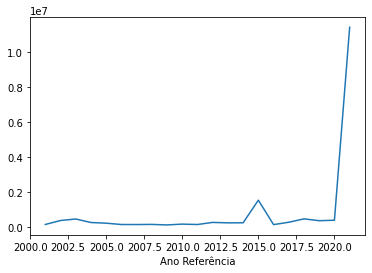

In [ ]:
# Plotar aqui esses valores depois! 

dfFull.groupby('Ano Referência')['Valor Pago'].max().plot()

In [ ]:
# Processo com maior valor pago:
dfFull.loc[dfFull['Valor Pago'] == dfFull['Valor Pago'].max()]

,Ano Referência,Beneficiário,Sexo,País Origem,Processo,Modalidade,Categoria/Nível,Inicio Processo,Término Processo,Valor Pago,Instituição Destino,Sigla Instituição Macro,País Destino,Sigla UF Destino,Grande Área,Área,Subárea,Nome Chamada,Programa CNPq,Sigla Instituição Destino,Cidade Destino,Título do Projeto,Palavra Chave,Instituição Origem,Sigla UF Origem,Faixa de Valor
69231,2021,Ticiana Della Justina Farias,F,EUA - Estados Unidos,201608/2019-7,PDE - Pós-doutorado no Exterior,NaN,2/1/2020,7/31/2021,11416340.15,University of Colorado,UC,EUA - Estados Unidos,NaN,Ciências Biológicas,Genética,Genética Humana e Médica,PDE - Pós Doutorado no Exterior - PDE,PROGRAMA BASICO DE GENETICA,UC,Denver,Mapeamento completo de variantes do complexo p...,"KIR, NGS, sequenciamento de nova geração, ...",University of Colorado,NaN,>= 20 mil


In [ ]:
# # Processo com maior valor pago por ano:

print(f'\nAno -> Processo nº, Beneficiário, Grande Área, País de Origem = Valor')

group = dfFull.groupby('Ano Referência')
for key,item in group:
  idMax = item['Valor Pago'].idxmax()
  max_row = item.loc[item.index==idMax]
  # num_processo = max_row['Processo'].values[0]
  # nome_benef = max_row['Beneficiário'].values[0]
  gA = max_row['Grande Área'].values[0]
  pais = max_row['País Origem'].values[0]
  valor = max_row['Valor Pago'].values[0]
  print(f'\n{key} -> {num_processo}, {nome_benef}, {gA}, {pais} = {valor}')


Ano -> Processo nº, Beneficiário, Grande Área, País de Origem = Valor


NameError: ignored

# Explorando a modalidade das bolsas por Ano


In [ ]:
dfFull['Modalidade'].mask(dfFull['Ano Referência'] >= 2018, dfFull['Modalidade'].str.split('- ', n = 1, expand = True)[1], inplace=True)


In [ ]:
dfFull.loc[dfFull['Modalidade'].str.contains("Iniciação Científica/PIBIC"), 'Modalidade'] = "Iniciação Científica"
dfFull['Modalidade'].value_counts().head(20)

Iniciação Científica                              1057565
Produtividade em Pesquisa                          334104
Mestrado                                           283258
Iniciação Científica Júnior                        233990
Doutorado                                          231821
Desenvolvimento Tecnonógico Industrial              89313
Iniciação Tecnológica Industrial                    76791
Apoio Técnico à Pesquisa                            56609
Iniciação Tecnológica/PIBITI                        53825
Graduação Sanduíche no Exterior                     46136
Extensão no País                                    40397
Iniciação Tecnológica                               27374
Apoio Técnico em Extensão no País                   25238
Pós-Doutorado Júnior                                23741
Fixação de Recursos Humanos                         15162
Programa de Capacitação Institucional               14242
Produtividade Desen. Tec. e Extensão Inovadora      11685
Doutorado no E

In [ ]:
dados_selecionados = dfFull[(dfFull['Modalidade'] == 'Doutorado')
 | (dfFull['Modalidade'] == 'Mestrado') 
 | (dfFull['Modalidade'] == 'Iniciação Científica')
 | (dfFull['Modalidade'] == 'Doutorado no Exterior')
 | (dfFull['Modalidade'] == 'Doutorado Sanduíche no Exterior')
 | (dfFull['Modalidade'] == 'Graduação Sanduíche no Exterior')
  ]
# dados_selecionados
csv_modalidade_por_ano = dados_selecionados.groupby(['Ano Referência','Modalidade']).size().reset_index()
csv_modalidade_por_ano.columns = ['Ano', 'Modalidade', 'Qtd'] 
csv_modalidade_por_ano = csv_modalidade_por_ano.pivot(index='Ano', columns='Modalidade', values="Qtd")
csv_modalidade_por_ano.to_csv(output_path+'modalidade_por_ano.csv')
csv_modalidade_por_ano

Modalidade,Doutorado,Doutorado Sanduíche no Exterior,Doutorado no Exterior,Graduação Sanduíche no Exterior,Iniciação Científica,Mestrado
Ano,,,,,,
2001,9206.0,218.0,570.0,NaN,35092.0,10069.0
2002,9088.0,191.0,551.0,NaN,32794.0,9716.0
2003,9325.0,115.0,418.0,NaN,33820.0,10391.0
2004,9686.0,220.0,341.0,NaN,36794.0,11025.0
2005,9554.0,207.0,254.0,NaN,36691.0,12040.0
2006,10240.0,201.0,171.0,NaN,38633.0,12956.0
2007,10586.0,336.0,156.0,NaN,42370.0,13681.0
2008,11224.0,456.0,154.0,NaN,47049.0,14913.0
2009,12305.0,474.0,146.0,NaN,52097.0,17469.0


In [ ]:
# outras = dfFull[(dfFull['Modalidade'] != 'Doutorado')
#  & (dfFull['Modalidade'] != 'Mestrado') 
#  & (dfFull['Modalidade'] != 'Iniciação Científica')
#  & (dfFull['Modalidade'] != 'Doutorado no Exterior')
#  & (dfFull['Modalidade'] != 'Doutorado Sanduíche no Exterior')
#  & (dfFull['Modalidade'] != 'Graduação Sanduíche no Exterior')
#   ]

dfFull.groupby(['Ano Referência']).size().reset_index()

,Ano Referência,0
0,2001,77228
1,2002,75608
2,2003,81328
3,2004,89195
4,2005,86987
5,2006,92695
6,2007,99704
7,2008,108527
8,2009,121040
9,2010,147133


In [ ]:
csv_modalidade_por_ano['Doutorado no Exterior'].sort_values(ascending=False)

Ano
2015    1577.0
2017    1313.0
2016    1221.0
2018    1092.0
2014     853.0
2019     700.0
2013     597.0
2001     570.0
2002     551.0
2003     418.0
2004     341.0
2012     340.0
2005     254.0
2006     171.0
2007     156.0
2008     154.0
2009     146.0
2010     138.0
2011     128.0
2020     120.0
2021      40.0
Name: Doutorado no Exterior, dtype: float64

In [ ]:
csv_modalidade_por_ano['Doutorado Sanduíche no Exterior'].sort_values(ascending=False)

Ano
2015    1457.0
2013    1019.0
2014     890.0
2012     746.0
2011     529.0
2009     474.0
2008     456.0
2010     455.0
2016     391.0
2007     336.0
2018     282.0
2019     237.0
2004     220.0
2001     218.0
2005     207.0
2006     201.0
2002     191.0
2017     186.0
2020     138.0
2003     115.0
2021     109.0
Name: Doutorado Sanduíche no Exterior, dtype: float64

In [ ]:
csv_modalidade_por_ano['Mestrado'].sort_values(ascending=False)

Ano
2009    17469.0
2011    17430.0
2010    16919.0
2012    15883.0
2013    15197.0
2008    14913.0
2015    14775.0
2014    14523.0
2016    14515.0
2017    14463.0
2018    14213.0
2007    13681.0
2019    13472.0
2006    12956.0
2005    12040.0
2020    11824.0
2004    11025.0
2003    10391.0
2001    10069.0
2002     9716.0
2021     7784.0
Name: Mestrado, dtype: float64

Para visualizar: https://public.flourish.studio/visualisation/7196768/

Vale pontuar: As bolsas GDE-Doc. no Exterior cairam 89% de 2018 p/ 2020 e de SWE - Doc. Sanduíche caíram 50% no mesmo período

In [ ]:
groups=dfFull.groupby(['Ano Referência'])['Modalidade']

for key,item in groups:
  print(f'\n{key}\n')
  print(item.value_counts().head(5))


2001

Iniciação Científica                      35092
Mestrado                                  10069
Produtividade em Pesquisa                  9935
Doutorado                                  9206
Desenvolvimento Tecnonógico Industrial     2973
Name: Modalidade, dtype: int64

2002

Iniciação Científica                      32794
Mestrado                                   9716
Produtividade em Pesquisa                  9291
Doutorado                                  9088
Desenvolvimento Tecnonógico Industrial     3247
Name: Modalidade, dtype: int64

2003

Iniciação Científica                      33820
Produtividade em Pesquisa                 11688
Mestrado                                  10391
Doutorado                                  9325
Desenvolvimento Tecnonógico Industrial     4189
Name: Modalidade, dtype: int64

2004

Iniciação Científica                      36794
Produtividade em Pesquisa                 14576
Mestrado                                  11025
Doutorado      

Agora não o número de bolsas, mas o somatório de valores: https://public.flourish.studio/visualisation/7231307/

In [ ]:
sum_modalidade_por_ano = dados_selecionados.groupby(['Ano Referência','Modalidade']).sum().reset_index()
sum_modalidade_por_ano['Valor Pago'] = sum_modalidade_por_ano['Valor Pago']/1000000 #Valores por milhão
sum_modalidade_por_ano.columns = ['Ano', 'Modalidade', 'Soma em Milhões'] 

sum_modalidade_por_ano = sum_modalidade_por_ano.pivot(index='Ano', columns='Modalidade', values="Soma em Milhões")
sum_modalidade_por_ano.to_csv(output_path+'modalidade_por_ano_soma.csv')
sum_modalidade_por_ano

Modalidade,Doutorado,Doutorado Sanduíche no Exterior,Doutorado no Exterior,Graduação Sanduíche no Exterior,Iniciação Científica,Mestrado
Ano,,,,,,
2001,75.321999,5.138348,25.581792,NaN,54.426428,50.416479
2002,74.002588,6.541011,32.972965,NaN,54.678106,48.761645
2003,93.551862,3.399222,26.969485,NaN,52.856154,51.714036
2004,122.298375,7.645742,18.434515,NaN,55.781227,67.368425
2005,133.885594,7.055092,12.713906,NaN,63.753301,74.478195
2006,152.312982,4.988253,7.239451,NaN,74.540300,86.104365
2007,165.437244,7.402140,6.404630,NaN,75.694800,94.069560
2008,193.213100,9.412112,5.916493,NaN,79.221300,118.660780
2009,219.256413,10.223345,5.949268,NaN,86.592600,145.886140


In [ ]:
grupo_ano.loc[2021]

96443

# Comparativo 2 anos de cada presidente


In [ ]:
presidentes = ['Lula','Lula2','Dilma','Bolsonaro']
ano_posse = [2003,2007,2011,2019]


df_presidentes = pd.DataFrame(ano_posse, index = presidentes, columns = ['Ano Posse'])

df_presidentes['Ano Anterior'] = df_presidentes['Ano Posse']-1

df_presidentes['Segundo Ano'] = df_presidentes['Ano Posse']+1

df_presidentes = df_presidentes.reset_index()

df_presidentes

,index,Ano Posse,Ano Anterior,Segundo Ano
0,Lula,2003,2002,2004
1,Lula2,2007,2006,2008
2,Dilma,2011,2010,2012
3,Bolsonaro,2019,2018,2020


In [ ]:
grupo_ano = dfFull.groupby(['Ano Referência']).size().reset_index()
# grupo_ano.loc[2018]
grupo_ano.columns = ['Ano Referência', 'Número']

In [ ]:
grupo_ano

,Ano Referência,Número
0,2001,77228
1,2002,75608
2,2003,81328
3,2004,89195
4,2005,86987
5,2006,92695
6,2007,99704
7,2008,108527
8,2009,121040
9,2010,147133


In [ ]:
merge_1 = pd.merge(df_presidentes,grupo_ano,left_on='Ano Anterior',right_on='Ano Referência')
merge_1

,index,Ano Posse,Ano Anterior,Segundo Ano,Ano Referência,Número
0,Lula,2003,2002,2004,2002,75608
1,Lula2,2007,2006,2008,2006,92695
2,Dilma,2011,2010,2012,2010,147133
3,Bolsonaro,2019,2018,2020,2018,148611


In [ ]:
resumo_bolsas_presidente = pd.merge(merge_1,grupo_ano,left_on='Segundo Ano',right_on='Ano Referência')
resumo_bolsas_presidente

,index,Ano Posse,Ano Anterior,Segundo Ano,Ano Referência_x,Número_x,Ano Referência_y,Número_y
0,Lula,2003,2002,2004,2002,75608,2004,89195
1,Lula2,2007,2006,2008,2006,92695,2008,108527
2,Dilma,2011,2010,2012,2010,147133,2012,172976
3,Bolsonaro,2019,2018,2020,2018,148611,2020,147101


In [ ]:
resumo_bolsas_presidente.columns

Index(['index', 'Ano Posse', 'Ano Anterior', 'Segundo Ano', 'Ano Referência_x',
       'Número_x', 'Ano Referência_y', 'Número_y'],
      dtype='object')

In [ ]:
resumo_bolsas_presidente

,index,Ano Posse,Ano Anterior,Segundo Ano,Número_x,Número_y
0,Lula,2003,2002,2004,75608,89195
1,Lula2,2007,2006,2008,92695,108527
2,Dilma,2011,2010,2012,147133,172976
3,Bolsonaro,2019,2018,2020,148611,147101


In [ ]:
resumo_bolsas_presidente['Variação (%)'] = (resumo_bolsas_presidente['Número_y']/resumo_bolsas_presidente['Número_x']-1) * 100
resumo_bolsas_presidente.filter(['index', 'Ano Posse', 'Ano Anterior', 'Segundo Ano',
       'Número_x', 'Número_y','Variação (%)'])

,index,Ano Posse,Ano Anterior,Segundo Ano,Número_x,Número_y,Variação (%)
0,Lula,2003,2002,2004,75608,89195,17.970321
1,Lula2,2007,2006,2008,92695,108527,17.079670
2,Dilma,2011,2010,2012,147133,172976,17.564381
3,Bolsonaro,2019,2018,2020,148611,147101,-1.016076


# Explorando a diferença nas Grandes Áreas do Conhecimento



In [ ]:
dfFull.groupby(['Ano Referência','Grande Área']).size().get(2018)

Grande Área
Ciências Agrárias              20410
Ciências Biológicas            19526
Ciências Exatas e da Terra     35340
Ciências Humanas               17160
Ciências Sociais Aplicadas      9522
Ciências da Saúde              16594
Engenharias                    18594
Indefinido                       164
Lingüística, Letras e Artes     5100
Outra                           3548
Tecnologias                     2653
dtype: int64

In [ ]:
groups=dfFull.groupby(['Ano Referência'])['Grande Área']

for key,item in groups:
  print(f'\n{key}\n')
  print(item.value_counts().head(11))


2018

Ciências Exatas e da Terra     35340
Ciências Agrárias              20410
Ciências Biológicas            19526
Engenharias                    18594
Ciências Humanas               17160
Ciências da Saúde              16594
Ciências Sociais Aplicadas      9522
Lingüística, Letras e Artes     5100
Outra                           3548
Tecnologias                     2653
Indefinido                       164
Name: Grande Área, dtype: int64

2019

Ciências Exatas e da Terra     34091
Ciências Agrárias              20193
Ciências Biológicas            19382
Engenharias                    17937
Ciências da Saúde              17492
Ciências Humanas               17154
Ciências Sociais Aplicadas     10336
Lingüística, Letras e Artes     5100
Outra                           4588
Tecnologias                     2773
Indefinido                       172
Name: Grande Área, dtype: int64

2020

Ciências Exatas e da Terra     34643
Ciências Agrárias              18796
Ciências Biológicas        

In [ ]:
csv_gArea_por_ano = dfFull.groupby(['Ano Referência','Grande Área']).size().reset_index()

In [ ]:
csv_gArea_por_ano.columns = ['Ano', 'Grande Área', 'Qtd'] 
csv_gArea_por_ano = csv_gArea_por_ano.pivot(index='Ano', columns='Grande Área', values="Qtd")
csv_gArea_por_ano.to_csv(output_path+'gArea_por_ano.csv')
csv_gArea_por_ano

Grande Área,Ciências Agrárias,Ciências Biológicas,Ciências Exatas e da Terra,Ciências Humanas,Ciências Sociais Aplicadas,Ciências da Saúde,Engenharias,Indefinido,"Lingüística, Letras e Artes",Outra,Tecnologias
Ano,,,,,,,,,,,
2018,20410,19526,35340,17160,9522,16594,18594,164,5100,3548,2653
2019,20193,19382,34091,17154,10336,17492,17937,172,5100,4588,2773
2020,18796,18474,34643,16748,9907,17831,17816,17,5019,4741,3109
2021,11370,11612,25766,10547,5906,10629,12553,18,3148,2427,2467


# Explorando a repetição de dados no conjunto: 
Cada bolsa é registrada por mês? Qual a lógica?

Para verificar repetições (ou verificar se cada mensalidade paga foi registrada separadamente), vamos observar a distribuição dos campos Processo e Beneficiário.  

*Ainda estou fazendo essa parte!

In [ ]:
df2018['Processo'].value_counts()

382052/2016-1    1
311929/2015-0    1
168472/2018-0    1
161247/2018-0    1
157028/2017-8    1
                ..
104868/2018-0    1
130418/2017-0    1
168104/2018-0    1
144579/2017-0    1
121344/2017-7    1
Name: Processo, Length: 148611, dtype: int64

In [ ]:
df2018['Processo'].str.startswith('140001').value_counts()

False    148607
True          4
Name: Processo, dtype: int64

In [ ]:
df2018['Beneficiário'].value_counts()

Pedro Henrique de Souza                   7
Vanessa Cristina da Silva                 6
Lucas Pereira da Silva                    5
Carlos Eduardo da Silva                   5
Roberto da Silva                          4
                                         ..
Anderson Faria Santos                     1
Raquel Santos Faria                       1
Mauro Valdir Schumacher                   1
Giovani Silva de Souza                    1
Gabriela Loureiro Lomonte Faria Santos    1
Name: Beneficiário, Length: 129834, dtype: int64

In [ ]:
df2018[df2018.Beneficiário == 'Marcia Aparecida de Barros da Cruz']

,Ano Referência,Processo,Inicio Processo,Término Processo,Beneficiário,Modalidade,Categoria/Nível,Nome Chamada,Programa CNPq,Grande Área,Área,Subárea,Instituição Destino,Sigla Instituição Destino,Sigla Instituição Macro,Cidade Destino,Sigla UF Destino,País Destino,Título do Projeto,Palavra Chave,Valor Pago
144647,2018,371891/2018-3,8/1/2018,10/31/2018,Marcia Aparecida de Barros da Cruz,EXP - Extensão no País,C,IEES 2017 - INCUBADORAS DE EMPREENDIMENTOS ECO...,"PROGRAMA ESPECIAL DE INCLUSÃO SOCIAL, IGUALDAD...",Ciências Humanas,Sociologia,Sociologia do Desenvolvimento,Universidade do Estado de Mato Grosso,UNEMAT,UNEMAT,Cáceres,MT,BRA - Brasil,Estruturação do Centro de Comercialização Soli...,NaN,3300
145769,2018,372623/2018-2,11/1/2018,11/30/2018,Marcia Aparecida de Barros da Cruz,EXP - Extensão no País,C,IEES 2017 - INCUBADORAS DE EMPREENDIMENTOS ECO...,"PROGRAMA ESPECIAL DE INCLUSÃO SOCIAL, IGUALDAD...",Ciências Humanas,Sociologia,Sociologia do Desenvolvimento,Universidade do Estado de Mato Grosso,UNEMAT,UNEMAT,Cáceres,MT,BRA - Brasil,Estruturação do Centro de Comercialização Soli...,NaN,1100
146027,2018,372791/2018-2,12/1/2018,2/28/2019,Marcia Aparecida de Barros da Cruz,EXP - Extensão no País,C,IEES 2017 - INCUBADORAS DE EMPREENDIMENTOS ECO...,"PROGRAMA ESPECIAL DE INCLUSÃO SOCIAL, IGUALDAD...",Ciências Humanas,Sociologia,Sociologia do Desenvolvimento,Universidade do Estado de Mato Grosso,UNEMAT,UNEMAT,Cáceres,MT,BRA - Brasil,Estruturação do Centro de Comercialização Soli...,NaN,1100
147333,2018,380622/2018-1,5/1/2018,8/31/2018,Marcia Aparecida de Barros da Cruz,DTI - Desenvolvimento Tecnológico Industrial,B,IEES 2017 - INCUBADORAS DE EMPREENDIMENTOS ECO...,"PROGRAMA ESPECIAL DE INCLUSÃO SOCIAL, IGUALDAD...",Ciências Humanas,Sociologia,Sociologia do Desenvolvimento,Universidade do Estado de Mato Grosso,UNEMAT,UNEMAT,Cáceres,MT,BRA - Brasil,Estruturação do Centro de Comercialização Soli...,NaN,9000


Ao identificar essa possível repetição, vamos criar novas colunas para melhor analisar os dados: 


1.   Dividir o número do processo em número, ano e dígito


# Períodos anteriores (2001-2017)



     |████████████████████████████████| 11.3 MB 12.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.3 which is incompatible.


In [ ]:
path2001 = '/content/drive/MyDrive/OPovo/Bolsonaro 1000 dias/Bolsas CNPQ/2001.xml'
df2001 = pd.read_xml(path2001, encoding='ISO-8859-1')

In [ ]:
df2001.head(1)

,ANO-PAGAMENTO,NRO-ID-CNPQ,NOME-COMPLETO,SEXO,PAIS-NASCIMENTO,CODIGO-DO-PROCESSO,MODALIDADE-DO-PROCESSO,CATEGORIA-NIVEL-DA-MODALIDADE,DATA-INICIO-PROCESSO,DATA-TERMINO-PROCESSO,TITULO-DO-PROCESSO,QUANTIDADE-MESES-PAGOS,VALOR-PAGO,MOEDA,NOME-INSTITUICAO,SIGLA-INSTITUICAO,PAIS-INSTITUICAO,SIGLA-UF-INSTITUICAO,NATUREZA-JURIDICA,NIVEL-DO-CURSO,NOME-CURSO,NOME-GRANDE-AREA-DO-CONHECIMENTO,NOME-DA-AREA-DO-CONHECIMENTO,NOME-DA-SUB-AREA-DO-CONHECIMENTO,NOME-DA-ESPECIALIDADE,QUANTIDADE-BOLSA-ANO
0,2001,9.865362e+15,Paulo Henrique Reis Pereira,M,Brasil,100001/2001-7,Iniciação Científica,NI,01/01/2001,31/07/2001,None,7.0,1690.57,REAL,Universidade Federal de Minas Gerais,UFMG,Brasil,MG,Autarquia Federal,None,None,Ciências Agrárias,Medicina Veterinária,Medicina Veterinária Preventiva,Não informado,0.58


In [ ]:
df2001.columns

Index(['ANO-PAGAMENTO', 'NRO-ID-CNPQ', 'NOME-COMPLETO', 'SEXO',
       'PAIS-NASCIMENTO', 'CODIGO-DO-PROCESSO', 'MODALIDADE-DO-PROCESSO',
       'CATEGORIA-NIVEL-DA-MODALIDADE', 'DATA-INICIO-PROCESSO',
       'DATA-TERMINO-PROCESSO', 'TITULO-DO-PROCESSO', 'QUANTIDADE-MESES-PAGOS',
       'VALOR-PAGO', 'MOEDA', 'NOME-INSTITUICAO', 'SIGLA-INSTITUICAO',
       'PAIS-INSTITUICAO', 'SIGLA-UF-INSTITUICAO', 'NATUREZA-JURIDICA',
       'NIVEL-DO-CURSO', 'NOME-CURSO', 'NOME-GRANDE-AREA-DO-CONHECIMENTO',
       'NOME-DA-AREA-DO-CONHECIMENTO', 'NOME-DA-SUB-AREA-DO-CONHECIMENTO',
       'NOME-DA-ESPECIALIDADE', 'QUANTIDADE-BOLSA-ANO'],
      dtype='object')

In [ ]:
# ['ANO-PAGAMENTO', 'NRO-ID-CNPQ', 'NOME-COMPLETO', 'SEXO',
#        'PAIS-NASCIMENTO', 'CODIGO-DO-PROCESSO', 'MODALIDADE-DO-PROCESSO',
#        'CATEGORIA-NIVEL-DA-MODALIDADE', 'DATA-INICIO-PROCESSO',
#        'DATA-TERMINO-PROCESSO', 'TITULO-DO-PROCESSO', 'QUANTIDADE-MESES-PAGOS',
#        'VALOR-PAGO', 'MOEDA', 'NOME-INSTITUICAO', 'SIGLA-INSTITUICAO',
#        'PAIS-INSTITUICAO', 'SIGLA-UF-INSTITUICAO', 'NATUREZA-JURIDICA',
#        'NIVEL-DO-CURSO', 'NOME-CURSO', 'NOME-GRANDE-AREA-DO-CONHECIMENTO',
#        'NOME-DA-AREA-DO-CONHECIMENTO', 'NOME-DA-SUB-AREA-DO-CONHECIMENTO',
#        'NOME-DA-ESPECIALIDADE', 'QUANTIDADE-BOLSA-ANO']



# ['Ano Referência', 'XXXX', 'Beneficiário', 'Sexo',
#        'País Origem', 'Processo', 'Modalidade',
#        'Categoria/Nível', 'Inicio Processo',
#        'Término Processo', 'XXXX', 'XXXX',
#        'Valor Pago', 'XXXX', 'Instituição Destino', 'Sigla Instituição Macro',
#        'País Destino', 'Sigla UF Destino', 'XXXX',
#        'NIVEL-DO-CURSO', 'XXXX', 'Grande Área',
#        'Área', 'Subárea',
#        'XXXX', 'XXXX'] 


df2001.columns=['Ano Referência', 'XXXX', 'Beneficiário', 'Sexo',
       'País Origem', 'Processo', 'Modalidade',
       'Categoria/Nível', 'Inicio Processo',
       'Término Processo', 'XXXX', 'XXXX',
       'Valor Pago', 'XXXX', 'Instituição Destino', 'Sigla Instituição Macro',
       'País Destino', 'Sigla UF Destino', 'XXXX',
       'XXXX', 'XXXX', 'Grande Área',
       'Área', 'Subárea',
       'XXXX', 'XXXX']

In [ ]:
df2001 = df2001[['Ano Referência', 'Beneficiário', 'Sexo',
       'País Origem', 'Processo', 'Modalidade',
       'Categoria/Nível', 'Inicio Processo',
       'Término Processo','Valor Pago', 'Instituição Destino', 'Sigla Instituição Macro',
       'País Destino', 'Sigla UF Destino','Grande Área','Área', 'Subárea']]

In [ ]:
dfFull = pd.concat([df2001, dfFull])